In [2]:
import pandas as pd
from itertools import combinations

In [3]:
prov_df = pd.read_excel('prov_detail_df.xlsx')

In [4]:
prov_df.columns

Index(['group_tin', 'prov_npi', 'prov_name', 'prov_mpin', 'prov_addr',
       'prov_cord', 'spec_code', 'subspec_code', 'spec', 'subspec'],
      dtype='object')

In [18]:
prov_df

,group_tin,prov_npi,prov_name,prov_mpin,prov_addr,prov_cord,spec_code,subspec_code,spec,subspec
0,123456790,100000001,Tamara Greene,1000,2013 Talbot Terrace Montgomery AL 36106,"(32.346206, -86.239281)",7,48,Emergency Medicine,Pediatric Emergency Medicine
1,123456790,100000001,Tamara Greene,1001,1230 Stafford Drive Montgomery AL 36117,"(32.32403, -86.14840099999999)",7,49,Emergency Medicine,Sports Medicine
2,123456790,100000001,Tamara Greene,1002,4604 Virginia Loop Road Montgomery AL 36116,"(32.314591, -86.24074999999999)",7,50,Emergency Medicine,Undersea and Hyperbaric Medicine
3,123456790,100000001,Tamara Greene,1003,132 Tensaw Road Montgomery AL 36117,"(32.384289, -86.147064)",7,45,Emergency Medicine,Medical Toxicology
4,123456790,100000001,Tamara Greene,1004,117 South Capitol Parkway Montgomery AL 36107,"(32.3777959, -86.284319)",7,44,Emergency Medicine,Internal Medicine–Critical Care Medicine
...,...,...,...,...,...,...,...,...,...,...
174705,123457429,100031971,John Byrd,175705,175 Creek Road Castleton VT 05735,"(43.6055996, -73.2336737)",15,74,Pathology,Hematopathology
174706,123457429,100031971,John Byrd,175706,1485 Hampshire Hollow Road Poultney VT 05764,"(43.538445, -73.166016)",15,74,Pathology,Hematopathology
174707,123457429,100031971,John Byrd,175707,93 Marble Hill Road Waitsfield VT 05673,"(44.181389, -72.866547)",15,77,Pathology,Pathology–Forensic
174708,123457429,100031972,Jordan Barron,175708,5 Meadow Lane Rutland VT 05701,"(43.619797, -72.983231)",13,64,Orthopaedic Surgery,Orthopaedic Sports Medicine


In [69]:
def get_weight(p_df,p_node_col,p_attr_col,p_attr_weight):
    v_left_df = p_df.groupby(by=[p_node_col,p_attr_col]).count().reset_index()[[p_node_col,p_attr_col]]
    v_right_df = v_left_df.copy()
    
    v_mrg_df = pd.merge(v_left_df,v_right_df,on=[p_attr_col])
    print("v_mrg_df.shape", v_mrg_df.shape)
    v_left_nm = p_node_col + '_x'
    v_right_nm = p_node_col + '_y'
    v_nonslf_mrg_df = v_mrg_df[v_mrg_df[v_left_nm] != v_mrg_df[v_right_nm]]
    print("v_nonslf_mrg_df.shape", v_nonslf_mrg_df.shape)
    v_nonslf_mrg_df.drop([p_attr_col],axis=1,inplace=True)
    v_nonslf_mrg_df.rename(columns={v_left_nm:'node_start',v_right_nm:'node_end'},inplace=True)
    print("p_attr_weight", p_attr_weight)
    v_nonslf_mrg_df['weight'] = p_attr_weight
    return v_nonslf_mrg_df

In [86]:
node_col = 'prov_npi'
attr_list = [('group_tin',1),('spec_code',2)]
appnd_df_list = []

for attr_ele in attr_list :
    temp_df = get_weight(prov_df.head(500),node_col,attr_ele[0],attr_ele[1])
    print("temp_df size :", temp_df.shape)
    appnd_df_list.append(temp_df)
    print("*"*5)
    
print("len appnd_df_list :", len(appnd_df_list))
cnct_df = pd.concat(appnd_df_list)
print("cnct_df.shape", cnct_df.shape)
aggr_df = cnct_df.groupby(by=['node_start','node_end']).sum().reset_index()
# aggr_df['weight'] = (1 / aggr_df['weight'])
aggr_df['cost'] = 1
aggr_df['color'] = 'b'
aggr_df.loc[aggr_df['weight'] == 2,'color'] = 'g'
aggr_df.loc[aggr_df['weight'] == 3,'color'] = 'r'
aggr_df.sort_values(by=['node_start','node_end'],inplace=True)

v_mrg_df.shape (5769, 3)
v_nonslf_mrg_df.shape (5682, 3)
p_attr_weight 1
temp_df size : (5682, 3)
*****
v_mrg_df.shape (407, 3)
v_nonslf_mrg_df.shape (320, 3)
p_attr_weight 2
temp_df size : (320, 3)
*****
len appnd_df_list : 2
cnct_df.shape (6002, 3)


C:\Users\Rakesh\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Rakesh\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-69-9e8ad204ca3a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_nonslf_mrg_df['weigh

In [87]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(aggr_df, 'node_start', 'node_end',['weight', 'cost','color'])

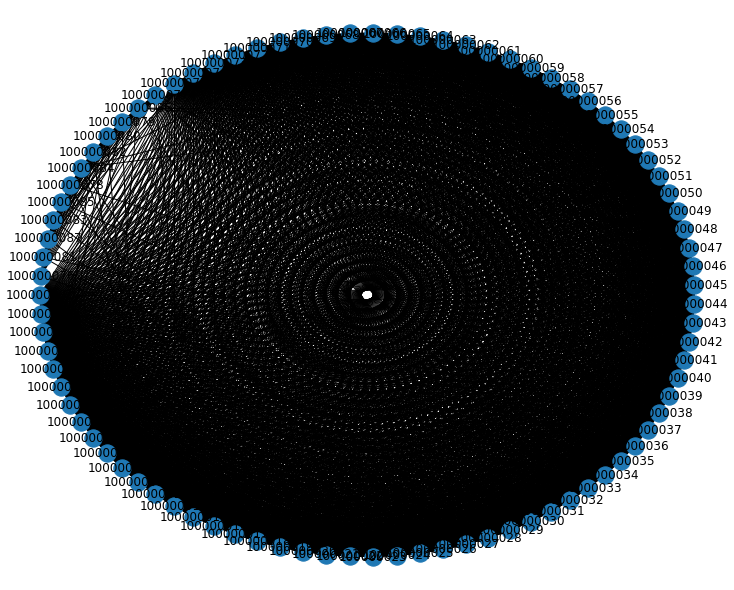

In [88]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

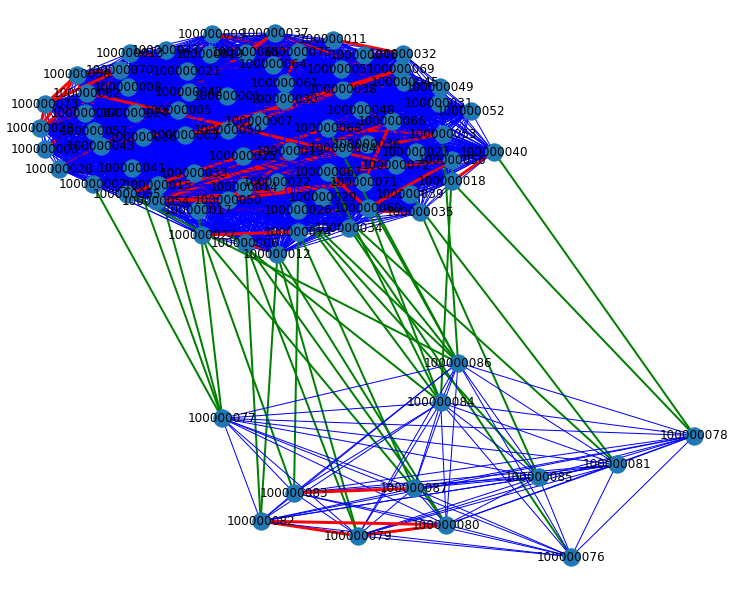

In [89]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, with_labels=True, width=weights,edge_color=colors)

In [47]:
aggr_df.head()

,node_start,node_end,weight
0,100000001,100000002,1
1,100000001,100000003,2
2,100000001,100000004,1
3,100000001,100000005,2
4,100000001,100000006,1


In [ ]:
import networkx as nx
from matplotlib.pyplot import figure
G = nx.Graph()
G = nx.from_pandas_edgelist(aggr_df, 'node_start', 'node_end')
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)